In [1]:
from sde import * 

# for next time:
# multiple for each size - 20+
# consistent scale

1. randomly generate x graphs, get average node centrality
2. compare similarity against average centrality

In [2]:
def averageCentrality(dg):
    centDict = nx.degree_centrality(dg)
    centList = list(centDict.values())
    avgCent = mean(centList)
    return avgCent

In [3]:
node_num = [40, 80, 120, 140, 180]
avgCent = {}
avgJaccard = {}
avgIS = {}
avgFS = {}

    
for n in node_num:
    for i in range(5):
        #get average centrality
        dg = makeDirectedGraph(n, int(n*1.5))
        avgCent[n] = averageCentrality(dg)

        #get similarity
        node_list = list(dg.nodes)
        node_pairs = list(it.combinations(node_list, 2))

        jindex, immSim, fullSim = [], [], []
        for pair in node_pairs:
            jindex.append(calculate_jaccard_similarity(dg, pair[0], pair[1]))
            immSim.append(get_immediate_similarity(dg, pair[0], pair[1]))
            fullSim.append(get_full_similarity(dg, pair[0], pair[1]))
    avgJaccard[n] = mean(jindex)
    avgIS[n] = mean(immSim)
    avgFS[n] = mean(fullSim)
    
    
    

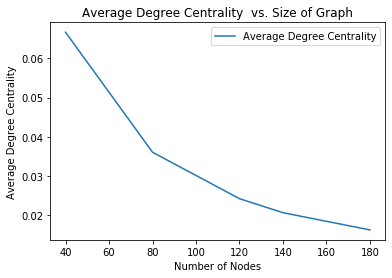

In [4]:
plt.plot(list(avgCent.keys()), list(avgCent.values()), label='Average Degree Centrality')

plt.xlabel('Number of Nodes')
plt.ylabel('Average Degree Centrality')
plt.title('Average Degree Centrality  vs. Size of Graph')
plt.legend()

plt.show()

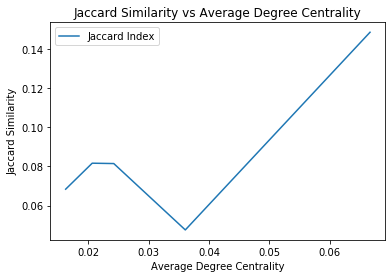

In [5]:
plt.plot(list(avgCent.values()), list(avgJaccard.values()), label='Jaccard Index')

plt.xlabel('Average Degree Centrality')
plt.ylabel('Jaccard Similarity')
plt.title('Jaccard Similarity vs Average Degree Centrality')
plt.legend()

plt.show()

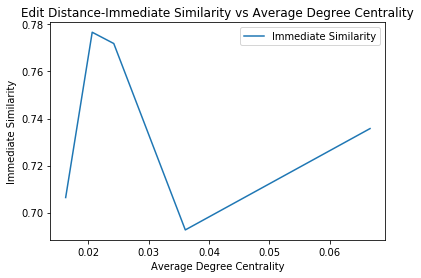

In [6]:
plt.plot(list(avgCent.values()), list(avgIS.values()), label='Immediate Similarity')

plt.xlabel('Average Degree Centrality')
plt.ylabel('Immediate Similarity')
plt.title('Edit Distance-Immediate Similarity vs Average Degree Centrality')
plt.legend()

plt.show()

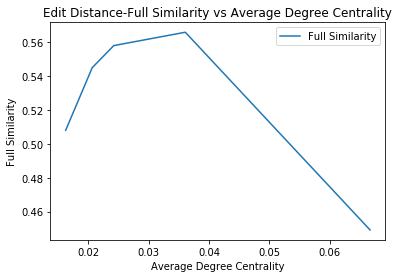

In [7]:
plt.plot(list(avgCent.values()), list(avgFS.values()), label='Full Similarity')

plt.xlabel('Average Degree Centrality')
plt.ylabel('Full Similarity')
plt.title('Edit Distance-Full Similarity vs Average Degree Centrality')
plt.legend()

plt.show()